In [15]:
import pandas as pd # data manipulation
import seaborn as sns # data viualize
import matplotlib.pyplot as plt # for plotting
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mall.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# univariate analysis

In [4]:
#  exploring each variable in a dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

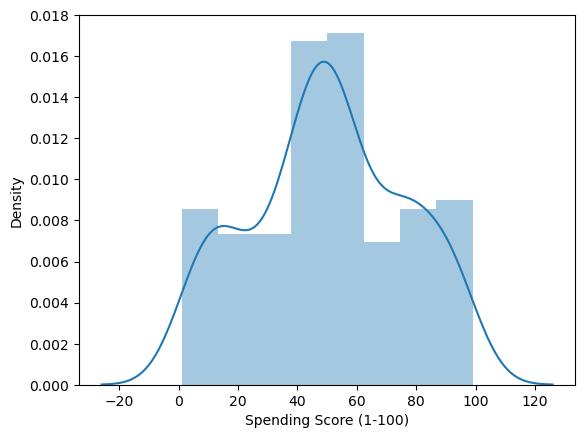

In [5]:
  sns.distplot(df['Spending Score (1-100)']) # to show distribution of data

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

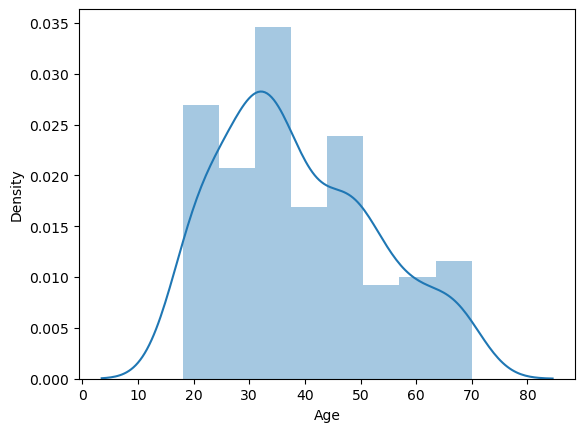

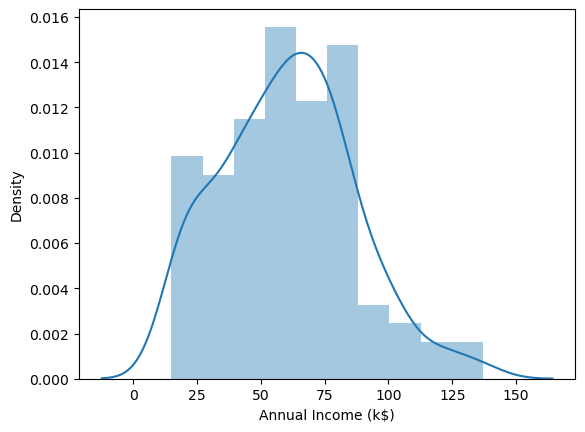

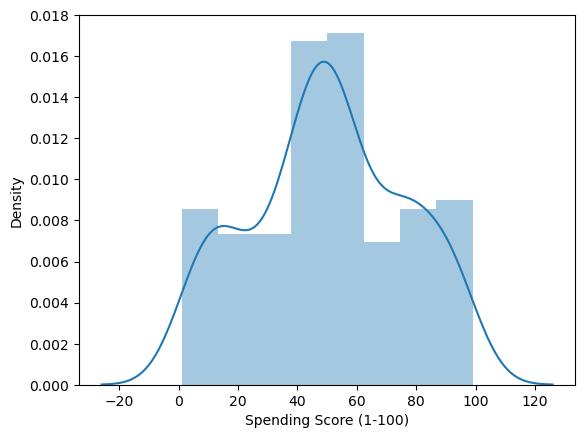

In [16]:
columns=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
         plt.figure()
         sns.distplot(df[i])
     

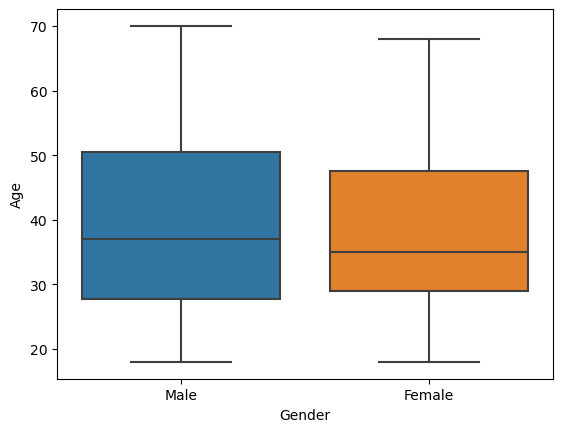

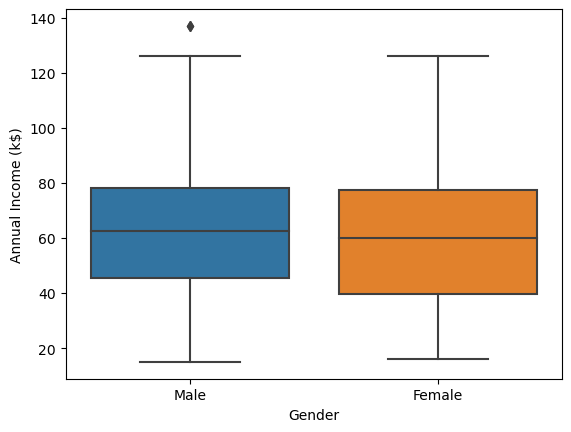

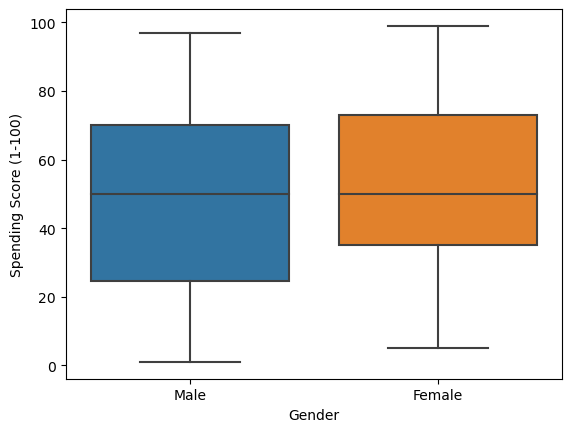

In [17]:
columns=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
         plt.figure()
         sns.boxplot(data=df,x='Gender',y=df[i])

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

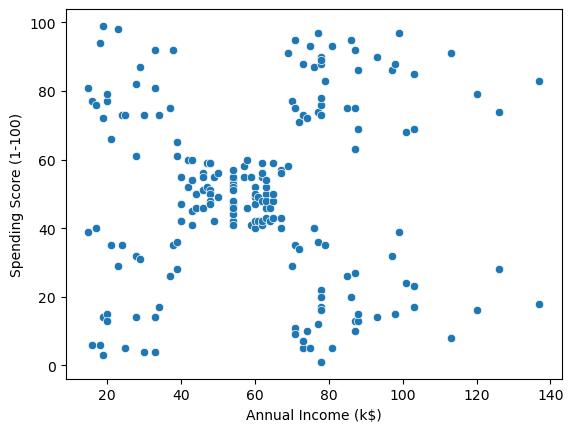

In [21]:
# 2 variables usually scatterplot
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')


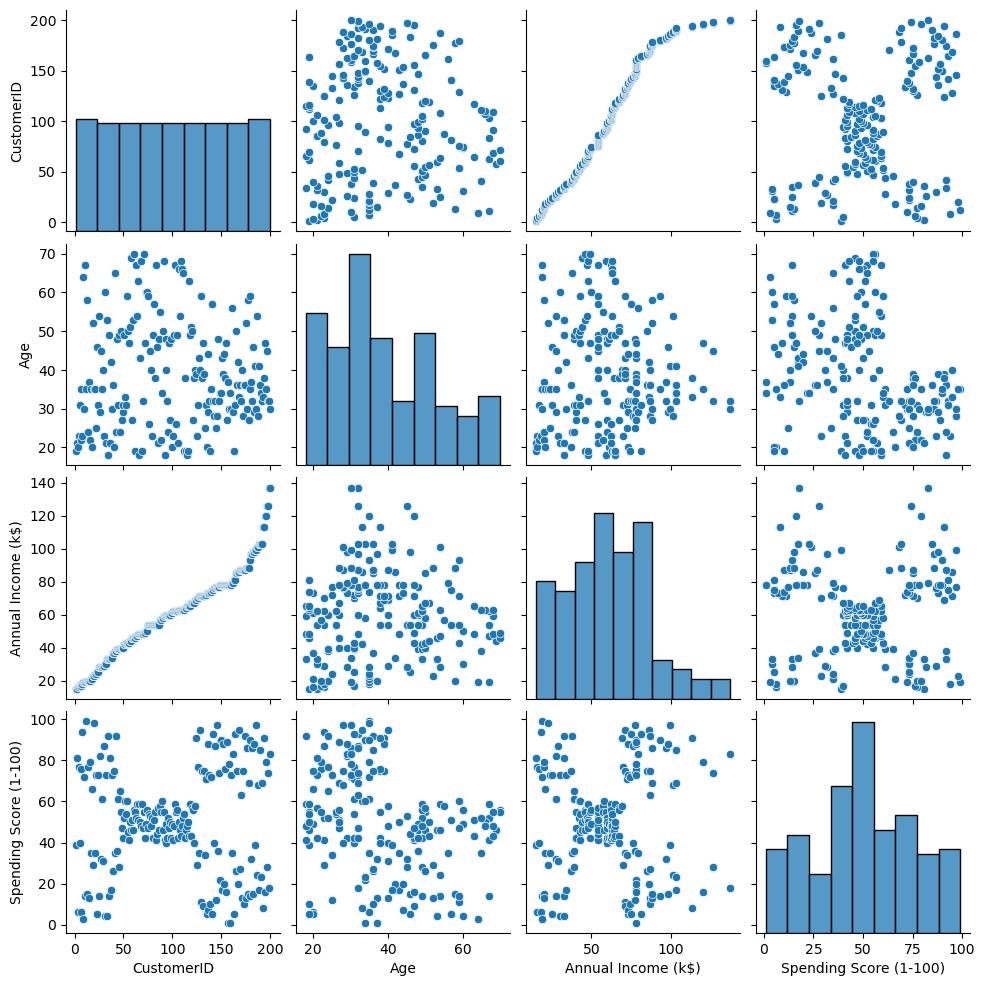

In [22]:

sns.pairplot(df) # a lot of info can be seen ehere

In [25]:
df=df.drop('CustomerID',axis=1)

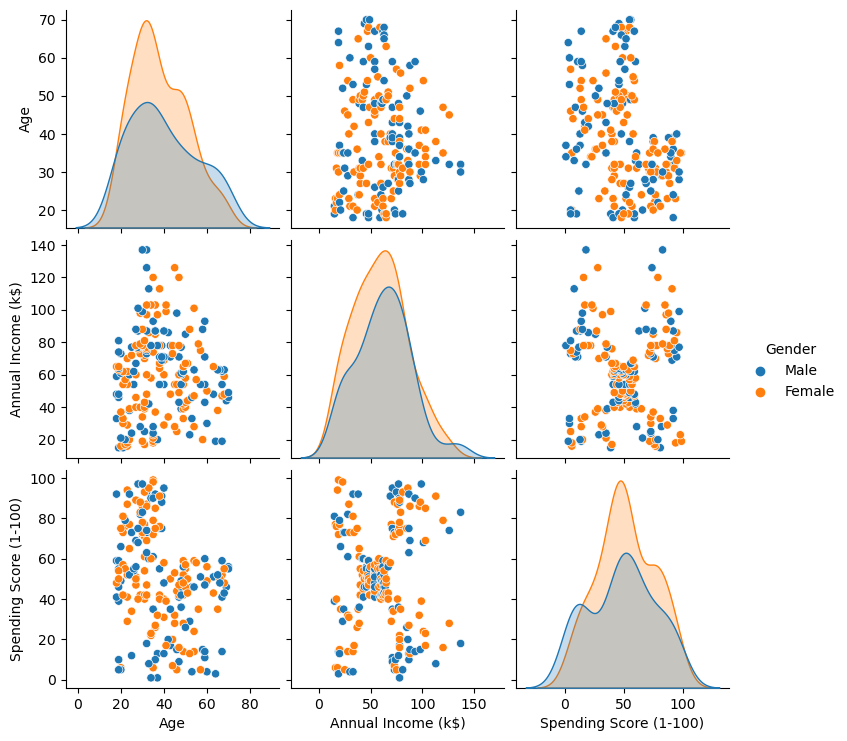

In [27]:
sns.pairplot(df, hue='Gender')

In [28]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

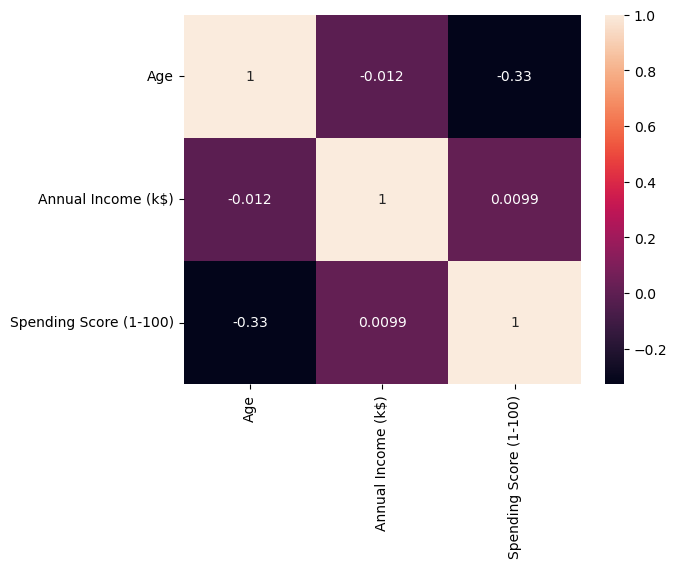

In [31]:
sns.heatmap(df.corr(),annot=True)

# K means clustering

In [32]:
c1=KMeans()

In [41]:
c1.fit(df[['Annual Income (k$)']])

KMeans()

In [37]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [42]:
c1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4])

In [44]:
df['Income Clust']=c1.labels_

In [45]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clust
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [47]:
df['Income Clust'].value_counts()

1    42
6    36
0    32
2    28
5    26
7    16
3    14
4     6
Name: Income Clust, dtype: int64

In [48]:
c1.inertia_
#distance between cebtroids of various clusters

2822.4996947496966

In [50]:
in_score=[]
for i in range(1,11):
    kms=KMeans(n_clusters=i)
    kms.fit(df[['Annual Income (k$)']])
    in_score.append(kms.inertia_)

In [51]:
in_score
# we need to pair it wwith each range

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5443.614973544973,
 3941.4163614163635,
 2822.4996947496966,
 2171.4722222222235,
 1763.6207792207797]

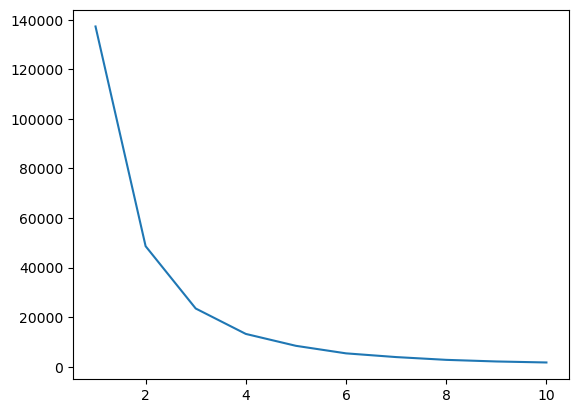

In [52]:
plt.plot(range(1,11),in_score)

In [53]:
# this was elbow method to find the change in centroids and here curve chsnges at 3 so we can use 3 as number of clusters to basically it was to fnd numbe ro f clusters


In [54]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Clust'],
      dtype='object')

In [59]:
c2=KMeans()

In [60]:
c2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans()

In [61]:
c2.labels_

array([4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6,
       4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 4, 6, 2, 6, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 7, 5, 1, 5, 7, 5, 7, 5,
       1, 5, 7, 5, 7, 5, 7, 5, 7, 5, 1, 5, 7, 5, 1, 5, 7, 5, 7, 5, 7, 5,
       7, 5, 7, 5, 7, 5, 1, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5, 7, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [62]:
df['S.Income clus']=c2.labels_

In [63]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clust,S.Income clus
0,Male,19,15,39,0,4
1,Male,21,15,81,0,6
2,Female,20,16,6,0,4
3,Female,23,16,77,0,6
4,Female,31,17,40,0,4


In [64]:
in_score2=[]
for i in range(1,11):
    kms2=KMeans(n_clusters=i)
    kms2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    in_score2.append(kms2.inertia_)

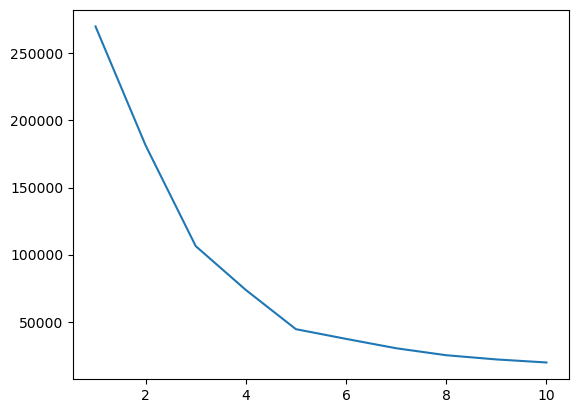

In [65]:
plt.plot(range(1,11),in_score2)

In [69]:
centers=pd.DataFrame(c2.cluster_centers_)
centers.columns=['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

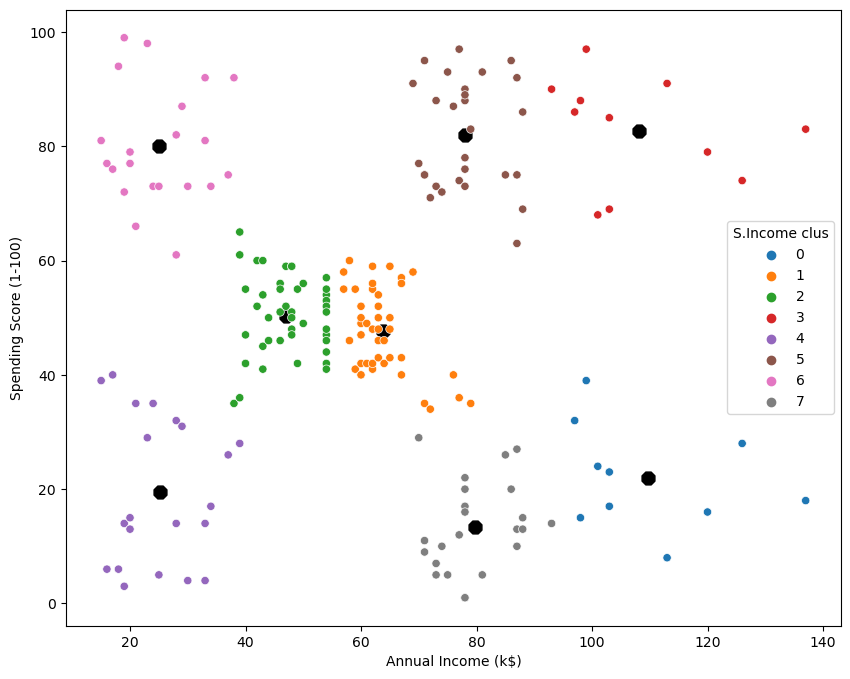

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='8')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='S.Income clus',palette='tab10')

In [74]:
pd.crosstab(df['S.Income clus'],df['Gender'],normalize='index')

Gender,Female,Male
S.Income clus,,
0,0.700000,0.300000
1,0.619048,0.380952
2,0.568182,0.431818
3,0.545455,0.454545
4,0.619048,0.380952
5,0.535714,0.464286
6,0.571429,0.428571
7,0.347826,0.652174
